In [4935]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data set


In [4936]:
#load data set
file_path = "Data/bank-additional/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=";")

In [4937]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4939]:
df.shape

(41188, 21)

In [4940]:
#Describe numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4941]:
#Categorical columns and their values
for col in df.select_dtypes(include=['object']).columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [4942]:
#explore categorical features
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [4943]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


In [4944]:
#missing values are coded as 'unknown' in the dataset, so we need to replace them with NaN
df.replace('unknown', np.nan, inplace=True)

In [4945]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [4946]:
#find features with one value
for column in df.columns:
    print(column,df[column].nunique())

age 78
job 11
marital 3
education 7
default 2
housing 2
loan 2
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


No features with one value

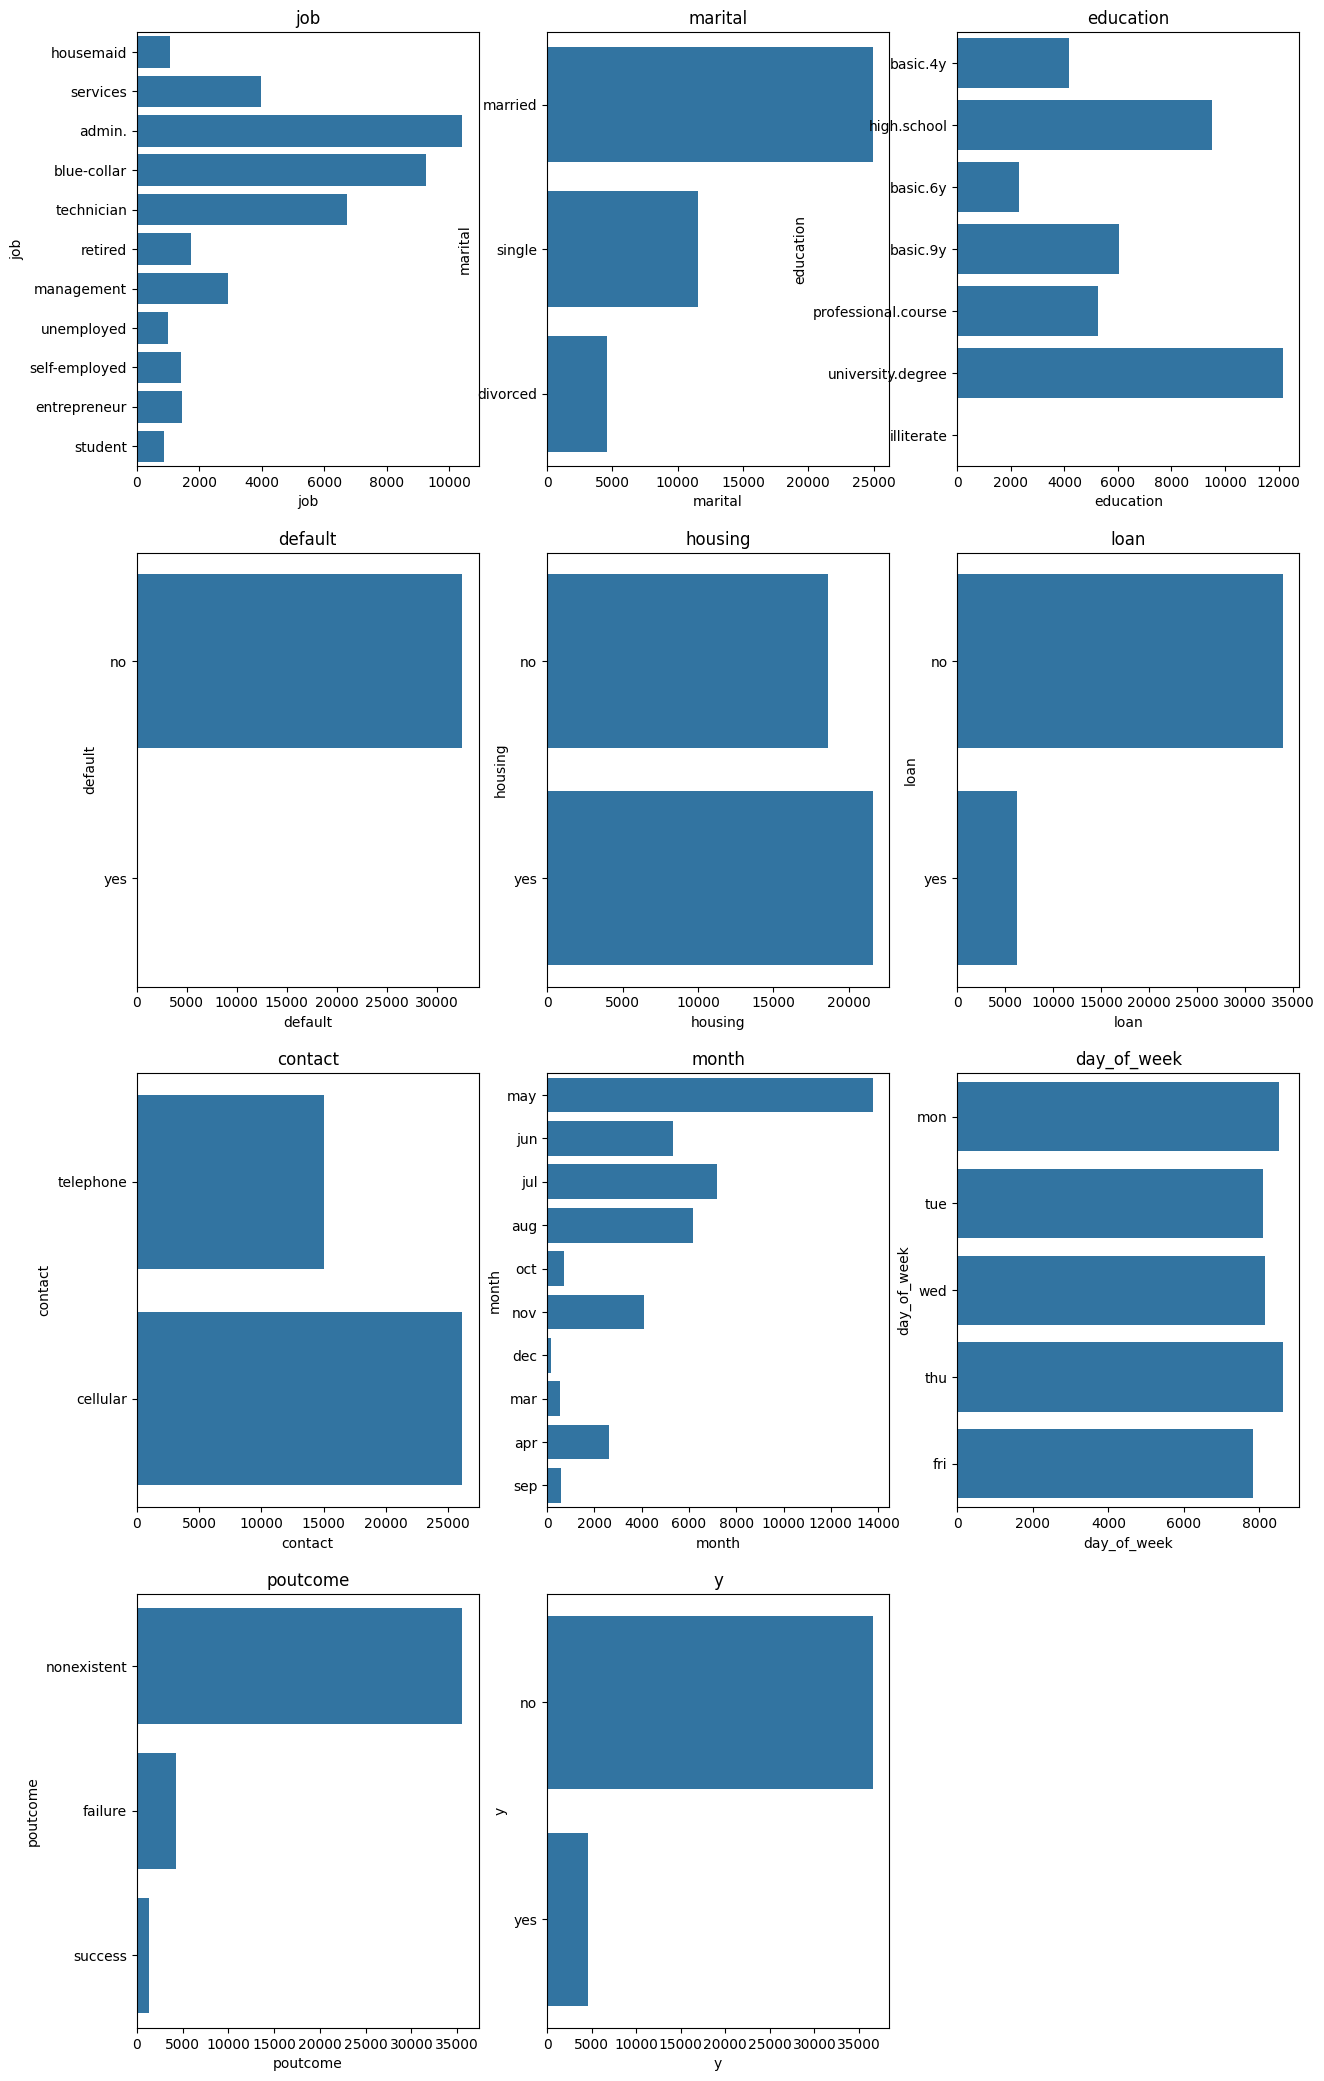

In [4947]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

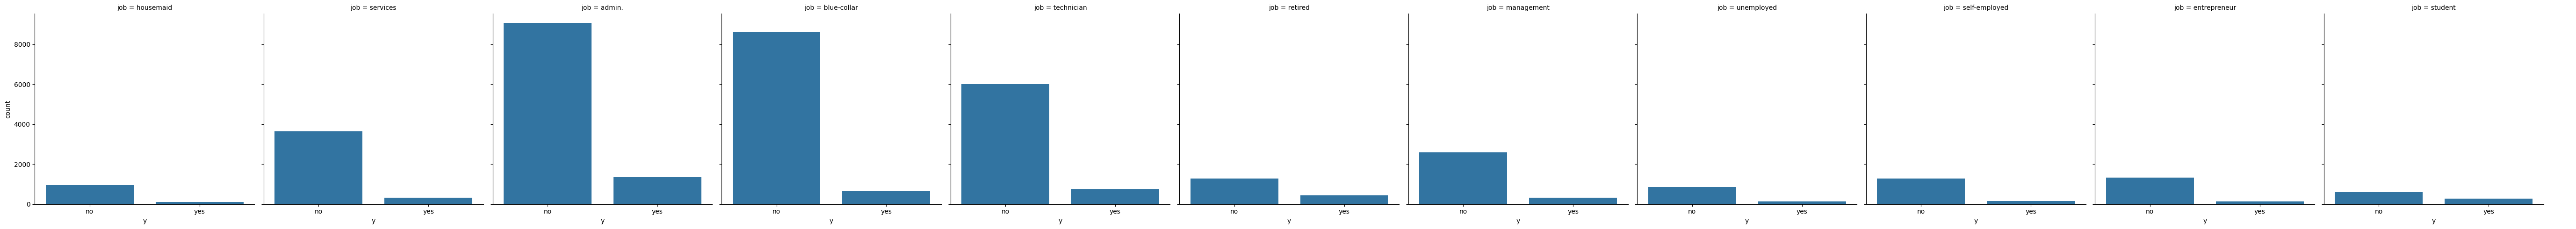

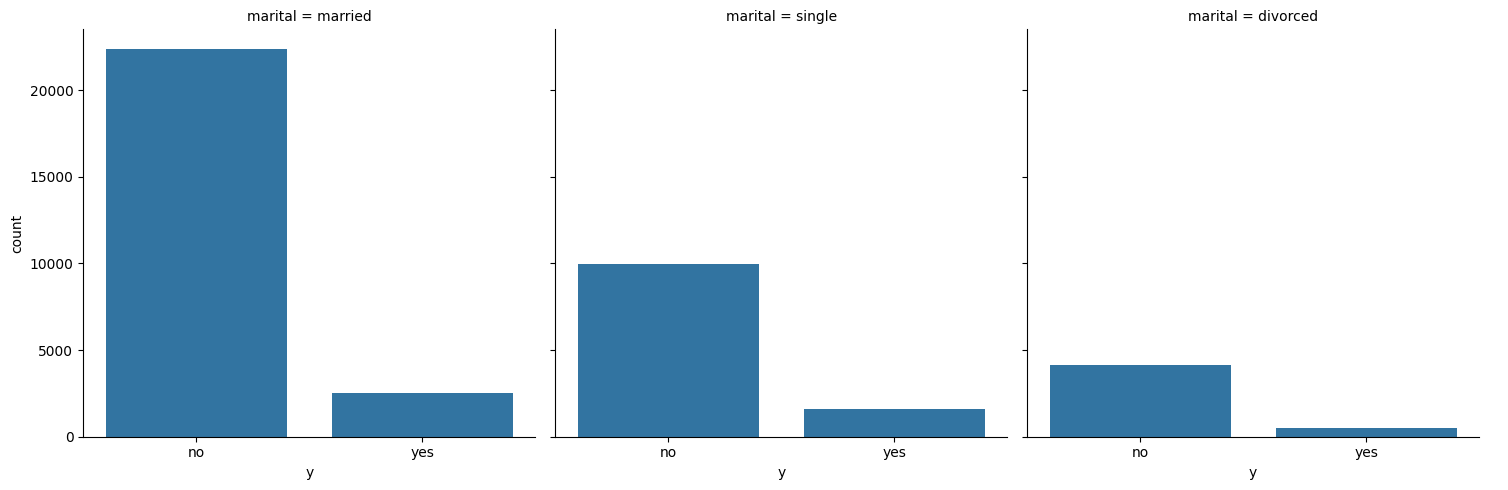

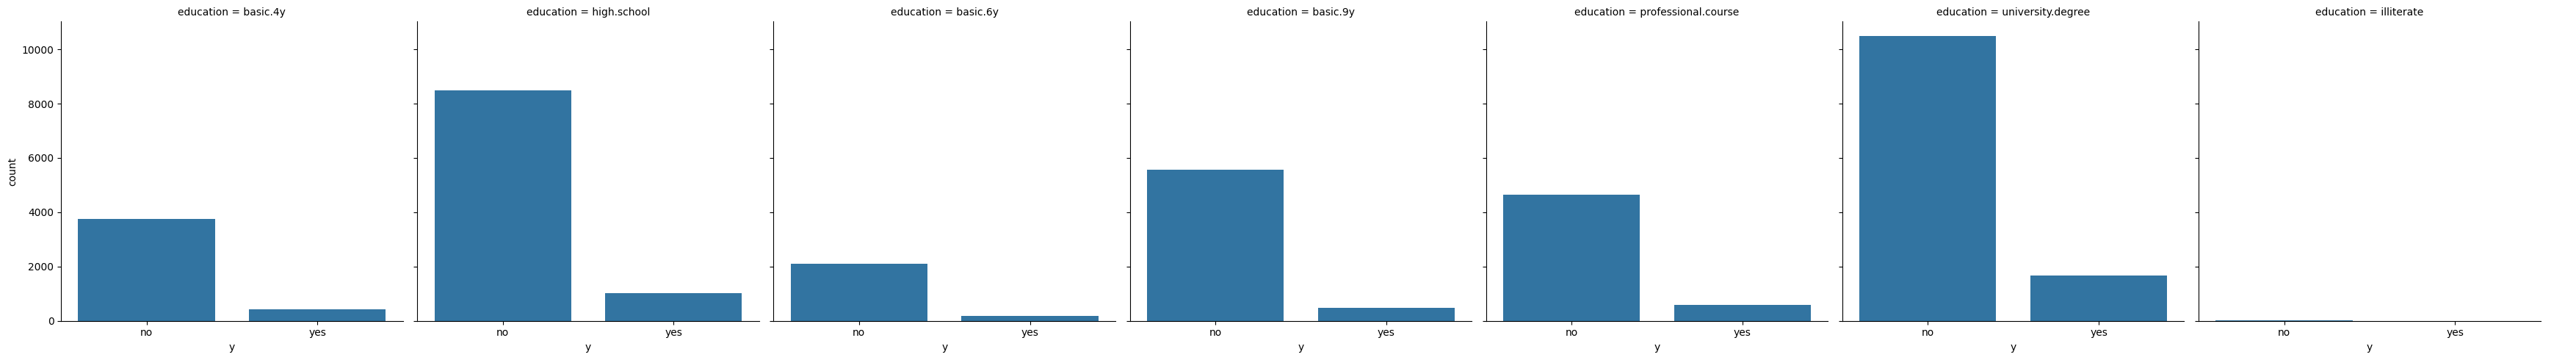

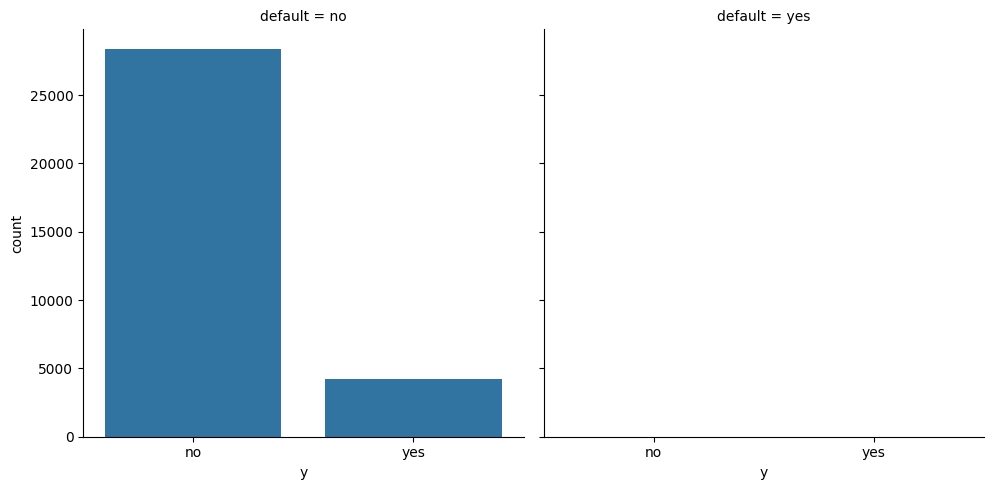

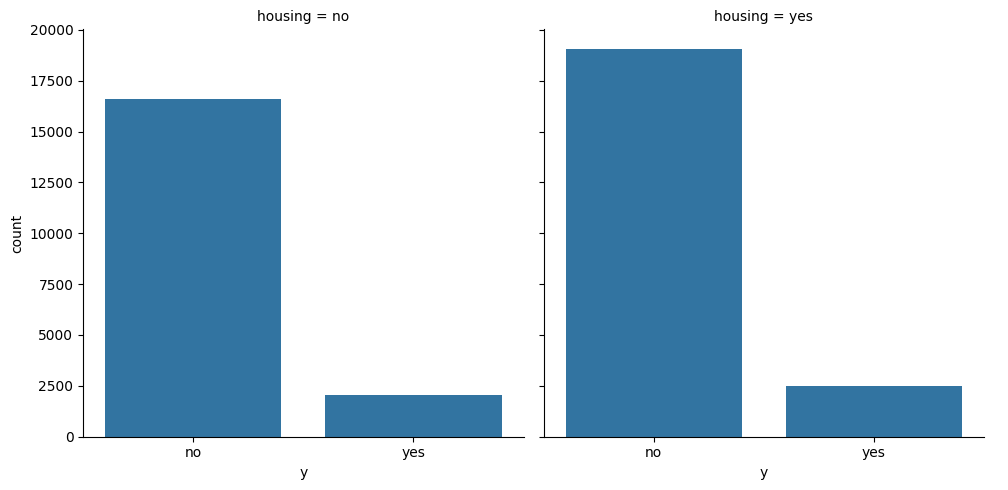

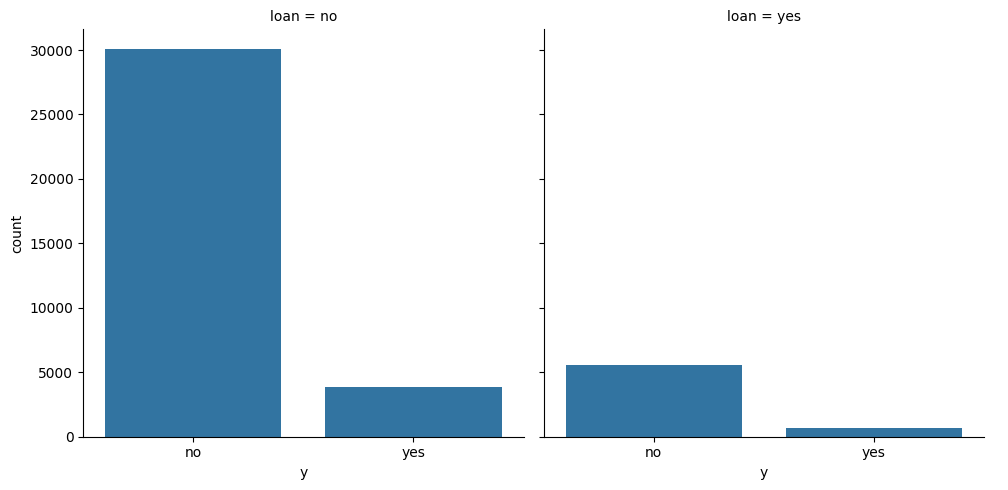

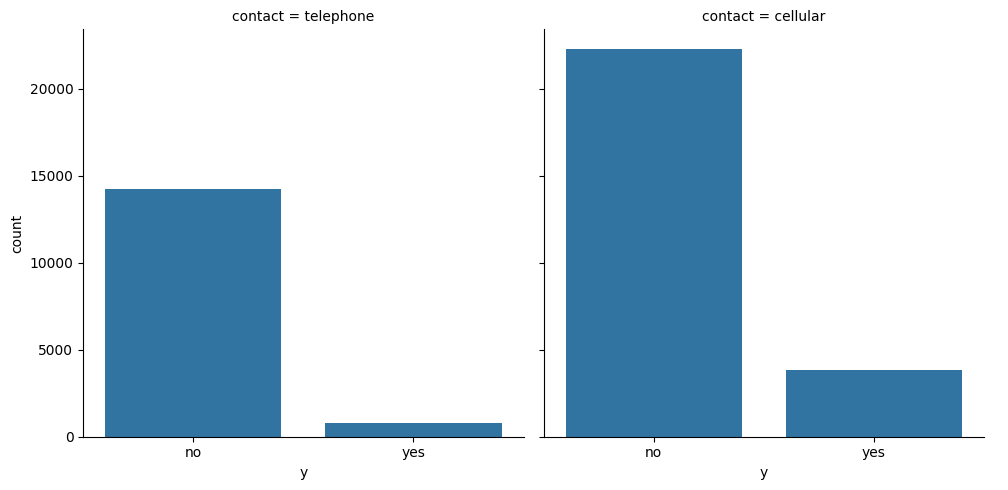

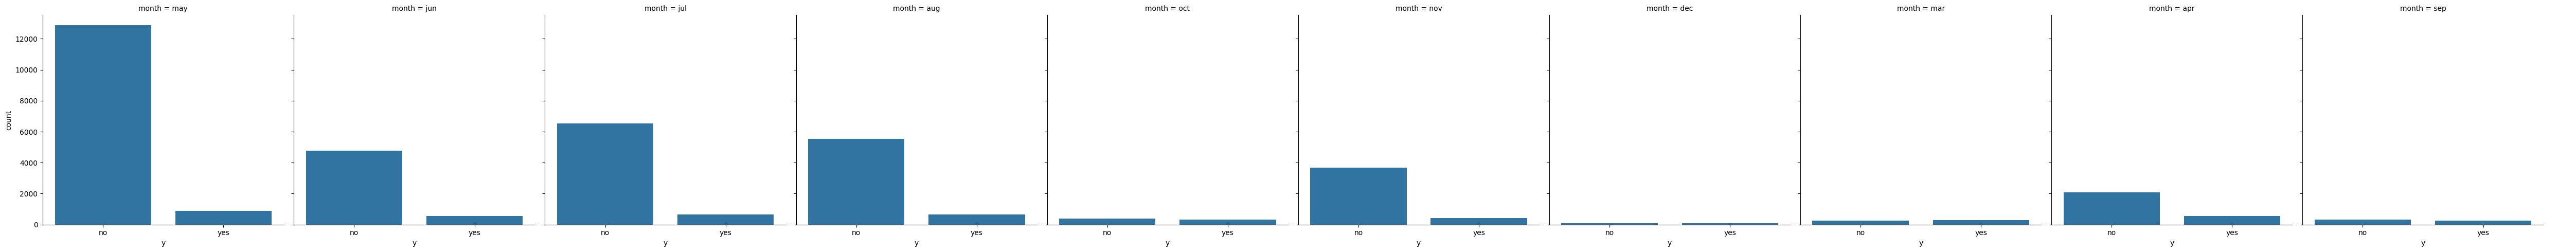

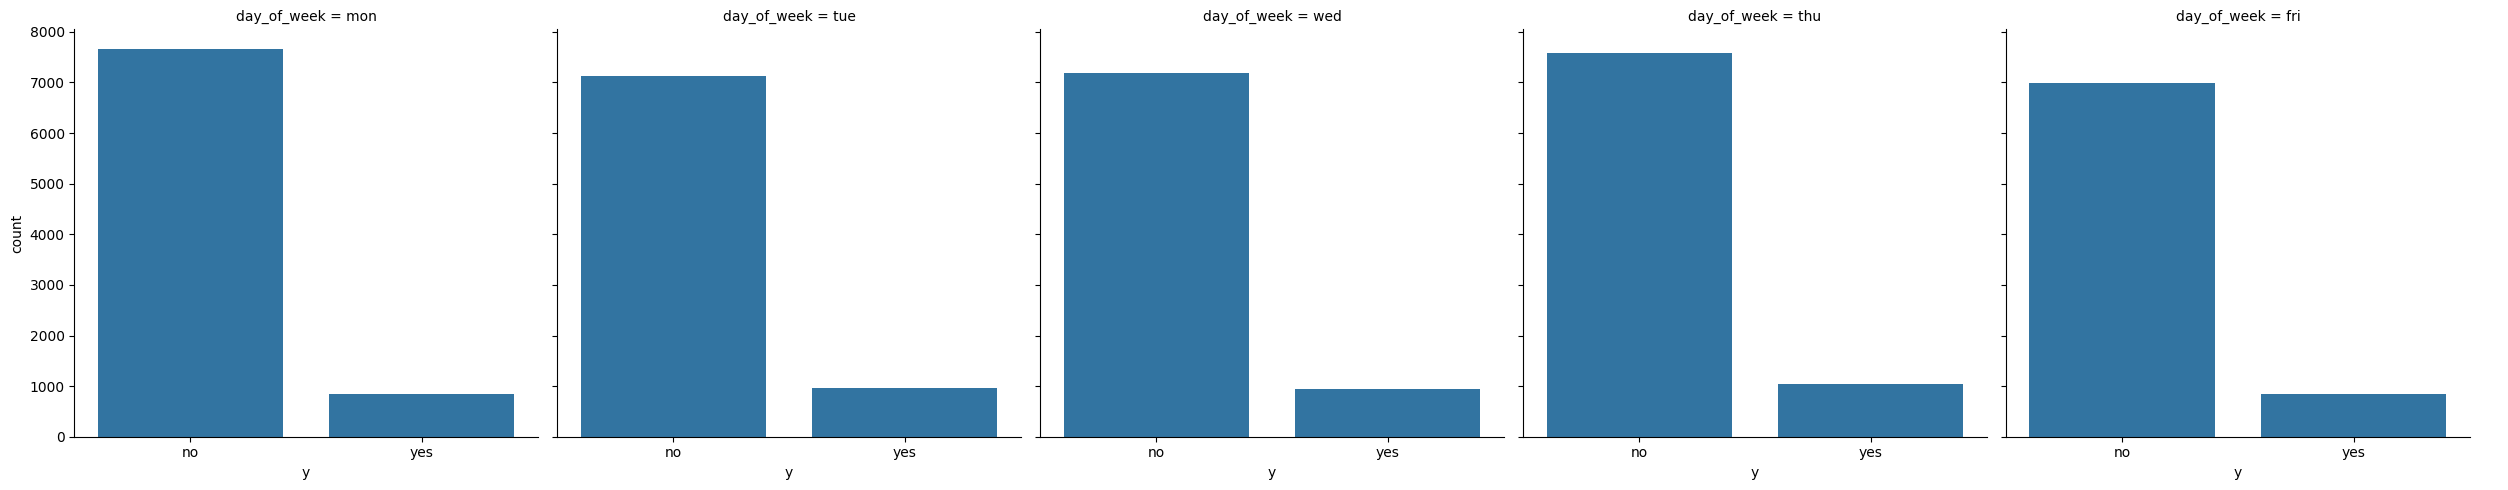

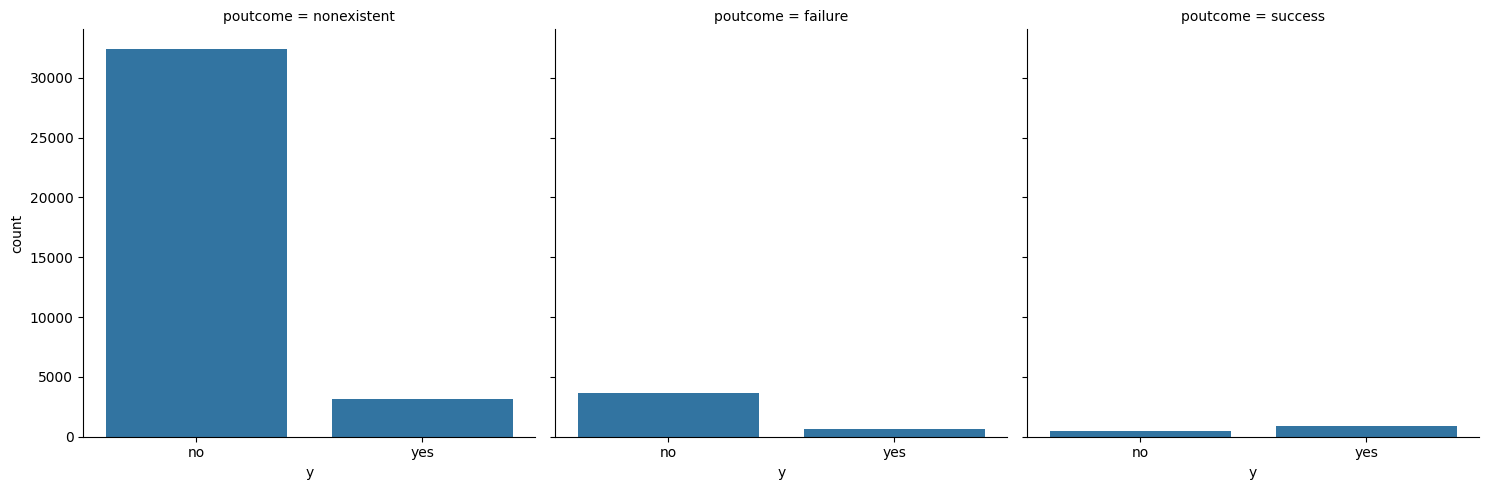

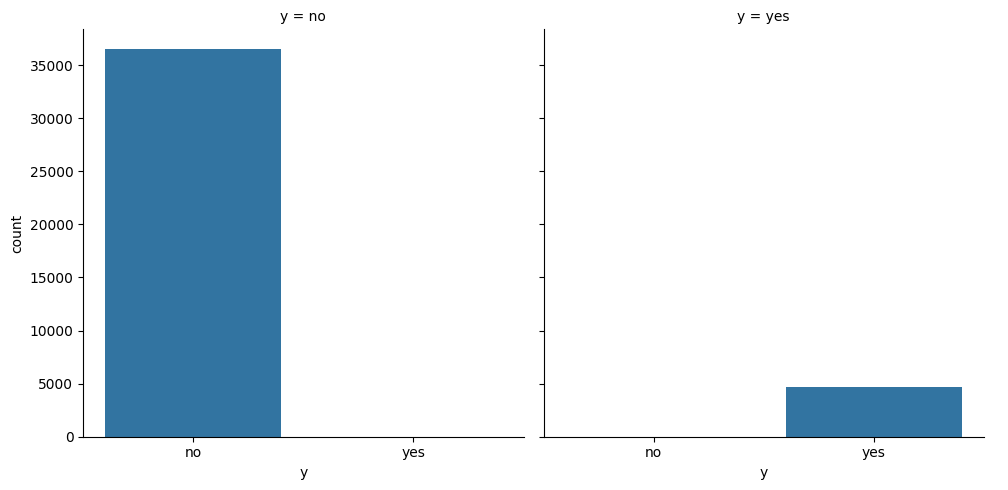

In [4948]:
#Relationship between Categorical Variables and Target Variable
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

Default does not add any value as very less yes values compared to no values

In [4949]:
#Explore numerical features

# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [4950]:
#Find discrete variables
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))


Discrete Variables Count: 3


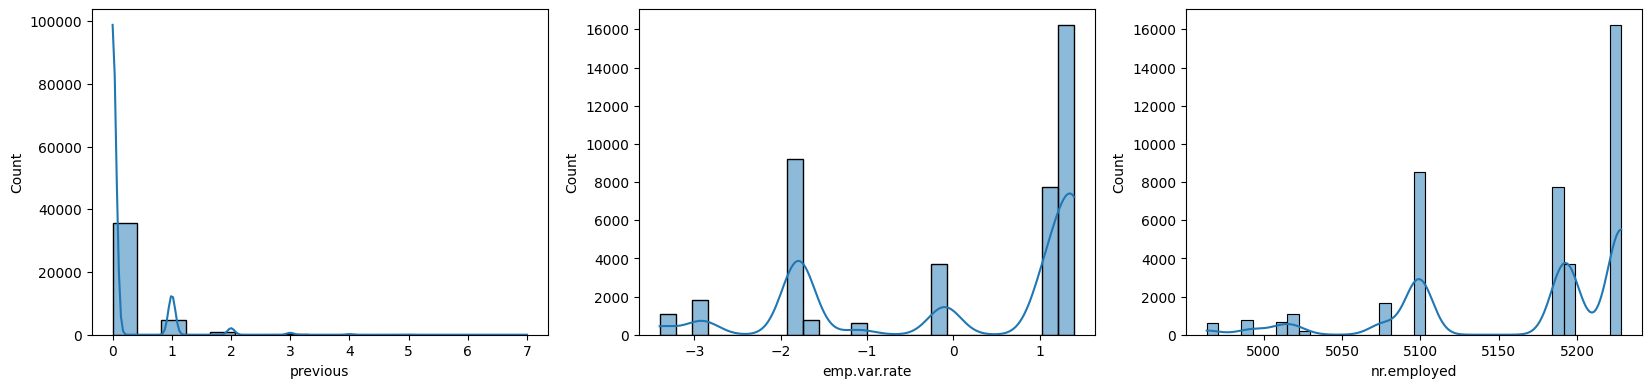

In [4951]:
#plot a univariate distribution of discrete observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for discrete_feature in discrete_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[discrete_feature], kde=True)
    plt.xlabel(discrete_feature)
    plotnumber+=1
plt.show()

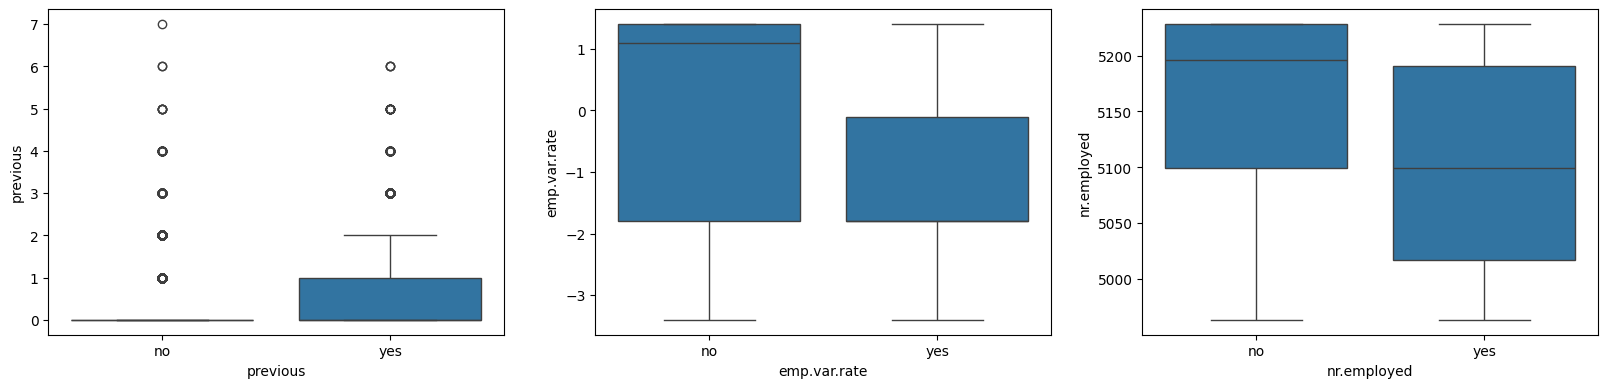

In [4952]:
#boxplot to show target distribution with respect discrete numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in discrete_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [4953]:
#Find continuous numerical features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


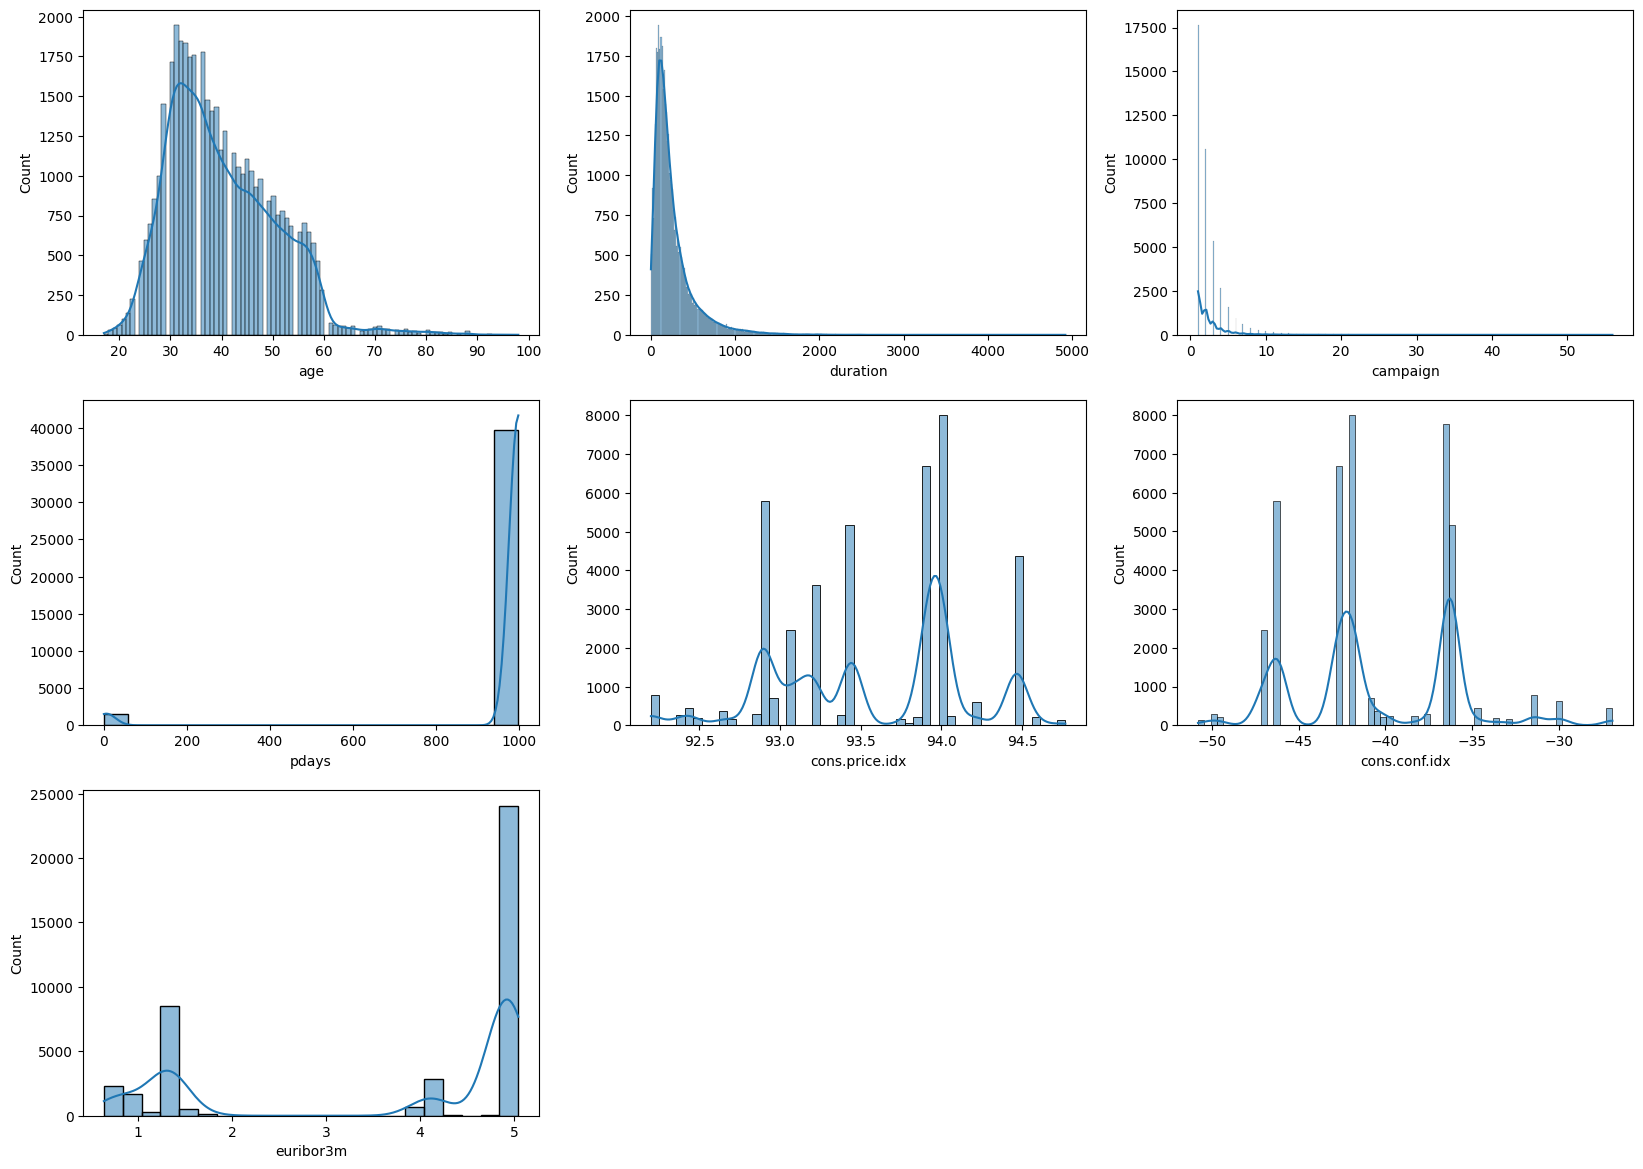

In [4954]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature], kde=True)
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

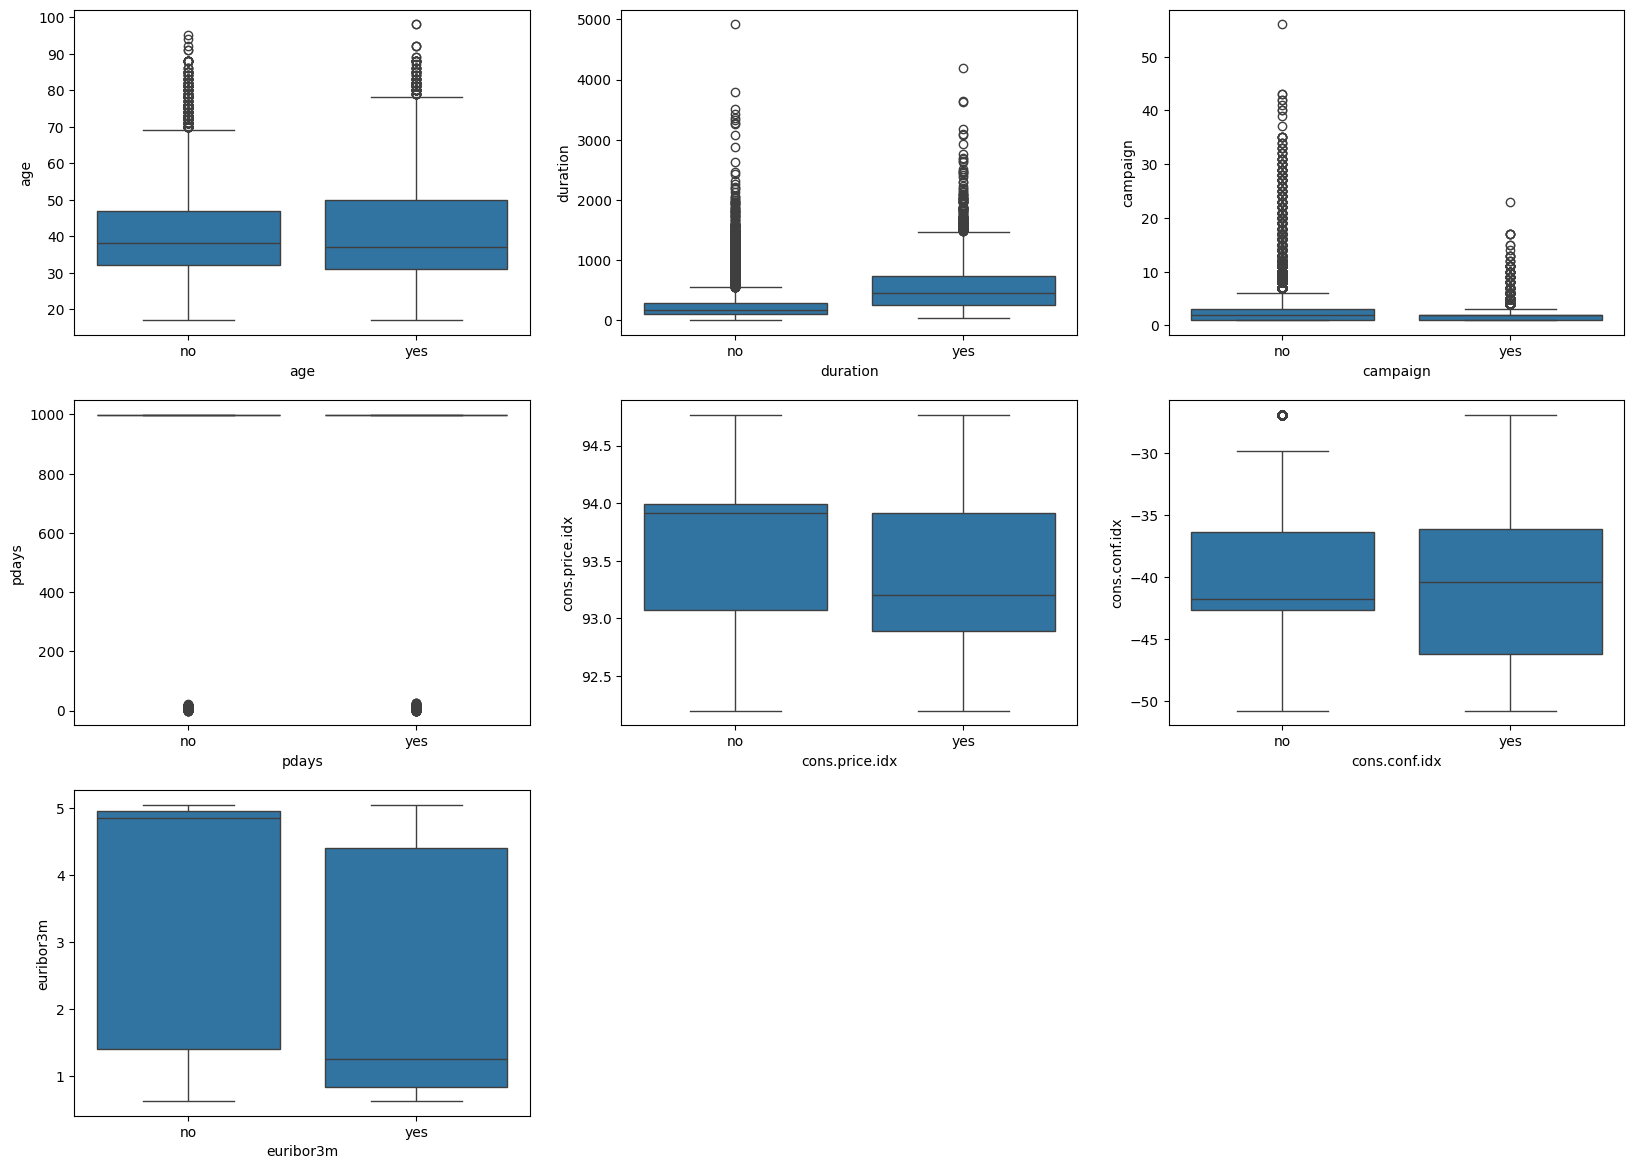

In [4955]:
#boxplot to show target distribution with respect continuous numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

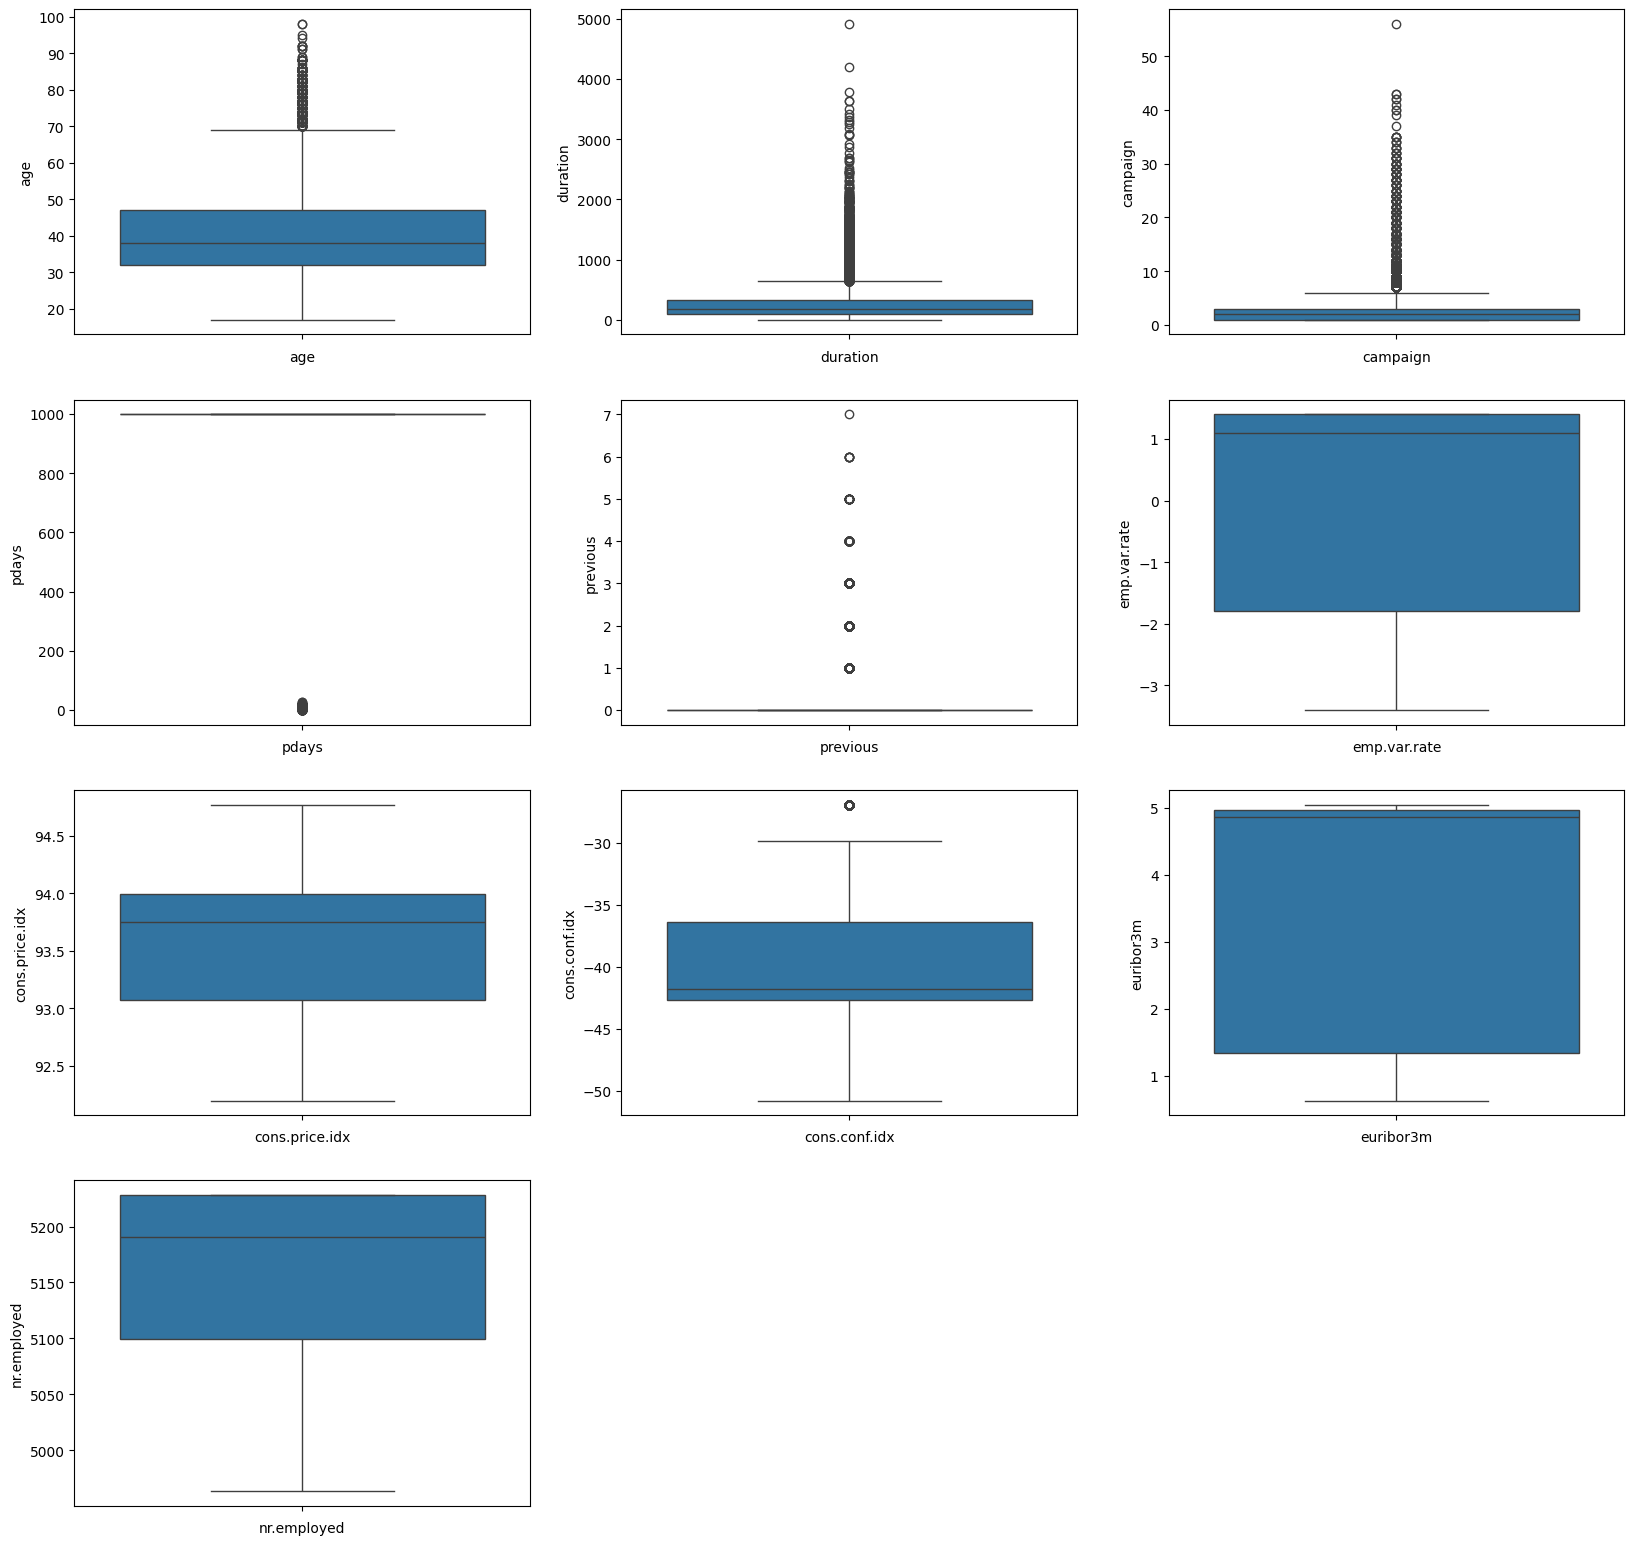

In [4956]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()


In [4957]:
import pandas as pd
import numpy as np

# Function to identify outliers and min/max values
def find_outliers(df, numerical_features, threshold=1.5):
    outlier_summary = {}
    
    for feature in numerical_features:
        # Calculate Q1, Q3, and IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Find outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        
        # Store results
        outlier_summary[feature] = {
            'min_value': df[feature].min(),
            'max_value': df[feature].max(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outliers),
            'outliers': outliers.tolist()  # Convert outliers to list
        }
        
    return outlier_summary


numerical_features = ['previous', 'age', 'campaign', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']  # Replace with your actual numerical features
outlier_info = find_outliers(df, numerical_features)

# Print summary
for feature, info in outlier_info.items():
    print(f"Feature: {feature}")
    print(f"  Min Value: {info['min_value']}")
    print(f"  Max Value: {info['max_value']}")
    print(f"  Lower Bound (for outliers): {info['lower_bound']}")
    print(f"  Upper Bound (for outliers): {info['upper_bound']}")
    print(f"  Number of Outliers: {info['num_outliers']}")
    print(f"  Outliers: {info['outliers']}")
    print("-" * 50)


Feature: previous
  Min Value: 0
  Max Value: 7
  Lower Bound (for outliers): 0.0
  Upper Bound (for outliers): 0.0
  Number of Outliers: 5625
  Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

find duplicates

In [4958]:
# Find duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicates)

# Count the number of duplicate rows
print("\nNumber of duplicate rows:", len(duplicates))

Duplicate rows:
       age          job   marital            education default housing loan  \
1266    39  blue-collar   married             basic.6y      no      no   no   
12261   36      retired   married                  NaN      no      no   no   
14234   27   technician    single  professional.course      no      no   no   
16956   47   technician  divorced          high.school      no     yes   no   
18465   32   technician    single  professional.course      no     yes   no   
20216   55     services   married          high.school     NaN      no   no   
20534   41   technician   married  professional.course      no     yes   no   
25217   39       admin.   married    university.degree      no      no   no   
28477   24     services    single          high.school      no     yes   no   
32516   35       admin.   married    university.degree      no     yes   no   
36951   45       admin.   married    university.degree      no      no   no   
38281   71      retired    single   

Find correlated features

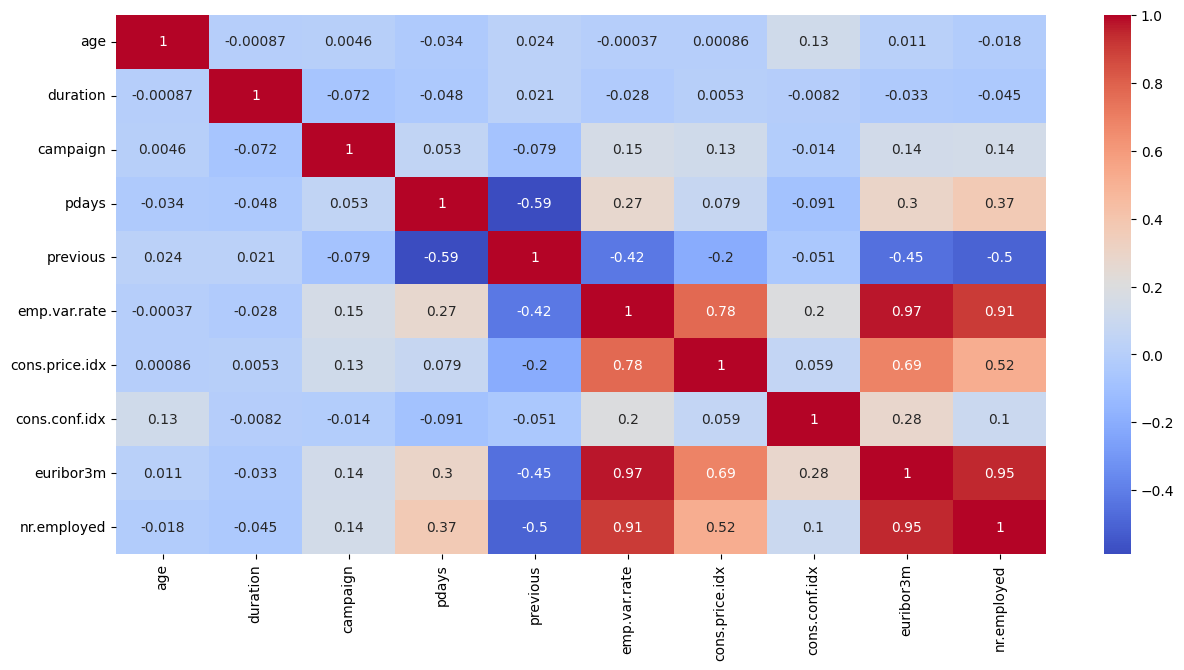

In [4959]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Checking for correlation
cor_mat = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap="coolwarm")
plt.show()

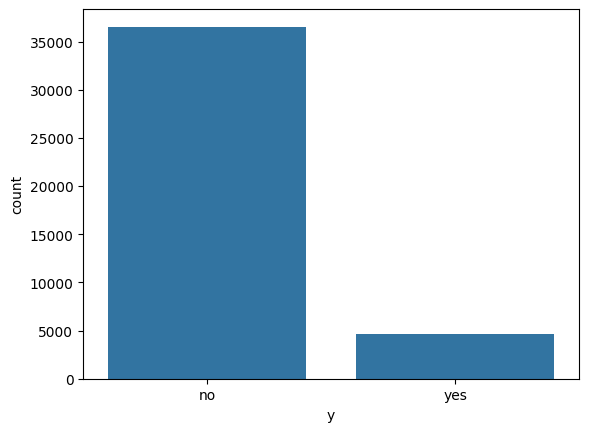

In [4960]:
#Check if data set is imbalanced
sns.countplot(x='y',data=df)
plt.show()

In [4961]:
df['y'].groupby(df['y']).count()

y
no     36548
yes     4640
Name: y, dtype: int64

## Preprocessing

In [4962]:
df_preprocessed = df.copy()

Remove Duplicates

In [4963]:
# Find duplicate rows
duplicates = df_preprocessed[df_preprocessed.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicates)

# Count the number of duplicate rows
print("\nNumber of duplicate rows:", len(duplicates))

Duplicate rows:
       age          job   marital            education default housing loan  \
1266    39  blue-collar   married             basic.6y      no      no   no   
12261   36      retired   married                  NaN      no      no   no   
14234   27   technician    single  professional.course      no      no   no   
16956   47   technician  divorced          high.school      no     yes   no   
18465   32   technician    single  professional.course      no     yes   no   
20216   55     services   married          high.school     NaN      no   no   
20534   41   technician   married  professional.course      no     yes   no   
25217   39       admin.   married    university.degree      no      no   no   
28477   24     services    single          high.school      no     yes   no   
32516   35       admin.   married    university.degree      no     yes   no   
36951   45       admin.   married    university.degree      no      no   no   
38281   71      retired    single   

In [4964]:
df_preprocessed.drop_duplicates(inplace=True)

drop default column as it has many missing values and it has the majority as no and does not clearly add a value

In [4965]:
df_preprocessed.drop(['default'], axis=1, inplace=True)

In [4966]:
df_preprocessed.shape

(41176, 20)

Drop unknown values

In [4967]:
df_preprocessed.dropna(inplace=True)

In [4968]:
df_preprocessed.shape

(38234, 20)

## Feature Engineering

Normalize numerical values

Z-score normalization = (x - mean) / standard deviation

In [4969]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_preprocessed[['age', 'campaign', 'pdays',	'previous',	'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(df_preprocessed[['age', 'campaign', 'pdays',	'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])
print(df_preprocessed)

            age          job  marital            education housing loan  \
0      1.568689    housemaid  married             basic.4y      no   no   
1      1.665884     services  married          high.school      no   no   
2     -0.278021     services  married          high.school     yes   no   
3      0.013565       admin.  married             basic.6y      no   no   
4      1.568689     services  married          high.school      no  yes   
...         ...          ...      ...                  ...     ...  ...   
41183  3.221008      retired  married  professional.course     yes   no   
41184  0.596736  blue-collar  married  professional.course      no   no   
41185  1.568689      retired  married    university.degree     yes   no   
41186  0.402346   technician  married  professional.course      no   no   
41187  3.318203      retired  married  professional.course     yes   no   

         contact month day_of_week  duration  campaign     pdays  previous  \
0      telephone   ma

Enocoding should be done to features with categorical variables

In [4970]:
# Replace 999 with 0 and all other values with 1 in the 'pdays' column as '0' to represent did not contact previously and '1' to represent contacted previously
df_preprocessed['pdays'] = df_preprocessed['pdays'].apply(lambda x: 0 if x == 999 else 1)

In [4971]:
df_preprocessed.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.568689,housemaid,married,basic.4y,no,no,telephone,may,mon,261,-0.566141,1,-0.349034,nonexistent,0.649536,0.735,0.895904,0.713025,0.328417,no
1,1.665884,services,married,high.school,no,no,telephone,may,mon,149,-0.566141,1,-0.349034,nonexistent,0.649536,0.735,0.895904,0.713025,0.328417,no
2,-0.278021,services,married,high.school,yes,no,telephone,may,mon,226,-0.566141,1,-0.349034,nonexistent,0.649536,0.735,0.895904,0.713025,0.328417,no
3,0.013565,admin.,married,basic.6y,no,no,telephone,may,mon,151,-0.566141,1,-0.349034,nonexistent,0.649536,0.735,0.895904,0.713025,0.328417,no
4,1.568689,services,married,high.school,no,yes,telephone,may,mon,307,-0.566141,1,-0.349034,nonexistent,0.649536,0.735,0.895904,0.713025,0.328417,no


In [4972]:
from sklearn.preprocessing import LabelEncoder
# Example: Converting target variable 'y' to numeric
label_encoder = LabelEncoder()
df_preprocessed['y'] = label_encoder.fit_transform(df_preprocessed['y'])  # 'yes'/'no' becomes 1/0

In [4973]:
#label encoding for binary-like values
for col in ['housing', 'loan', 'contact']:
    df_preprocessed[col] = label_encoder.fit_transform(df_preprocessed[col])

In [4974]:
#hot encoding for nominal variables
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['job', 'marital', 'month', 'day_of_week', 'poutcome', 'education'], drop_first=True)


In [4975]:
df_preprocessed.head()

,age,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,1.568689,0,0,1,261,-0.566141,1,-0.349034,0.649536,0.735,...,False,False,True,False,False,False,False,False,False,False
1,1.665884,0,0,1,149,-0.566141,1,-0.349034,0.649536,0.735,...,False,False,True,False,False,False,True,False,False,False
2,-0.278021,1,0,1,226,-0.566141,1,-0.349034,0.649536,0.735,...,False,False,True,False,False,False,True,False,False,False
3,0.013565,0,0,1,151,-0.566141,1,-0.349034,0.649536,0.735,...,False,False,True,False,True,False,False,False,False,False
4,1.568689,0,1,1,307,-0.566141,1,-0.349034,0.649536,0.735,...,False,False,True,False,False,False,True,False,False,False


Removing outliers

In [4976]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to check and corresponding multipliers
columns_to_check = ['age', 'campaign', 'cons.conf.idx']
multipliers = [3, 15, 15]

def remove_outliers(df, col, multiplier):
   
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Print the bounds and count of outliers
    print(f"Bounds for {col} - Lower: {lower_bound}, Upper: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}\n")

    # Drop the outliers from the DataFrame
    return df.drop(outliers.index)

# Process each column with its respective multiplier
for col, multiplier in zip(columns_to_check, multipliers):
    df_preprocessed = remove_outliers(df_preprocessed, col, multiplier)


Bounds for age - Lower: -5.137782997791503, Upper: 5.067717213207956
Number of Outliers: 4

Bounds for campaign - Lower: -11.40530750376865, Upper: 10.995637605014474
Number of Outliers: 17

Bounds for cons.conf.idx - Lower: -20.909419981413905, Upper: 21.338394470532865
Number of Outliers: 0



## Models

In [4977]:
#copy a data frame for testing neural networks
df_nn = df_preprocessed.copy()

In [4978]:
#copy a data frame for testing random forest
df_rf = df_preprocessed.copy()

In [4979]:
df_nn.shape

(38213, 47)

Neural network

In [4980]:
import pandas as pd
import numpy as np

# Calculate correlation matrix
corr_matrix = df_nn.corr()

# Set a threshold for correlation
threshold = 0.9
correlated_features = set()

# Loop through the matrix to find correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Drop the correlated features
df_nn = df_nn.drop(columns=correlated_features)
print(df_nn)


            age  housing  loan  contact  duration  campaign  pdays  previous  \
0      1.568689        0     0        1       261 -0.566141      1 -0.349034   
1      1.665884        0     0        1       149 -0.566141      1 -0.349034   
2     -0.278021        1     0        1       226 -0.566141      1 -0.349034   
3      0.013565        0     0        1       151 -0.566141      1 -0.349034   
4      1.568689        0     1        1       307 -0.566141      1 -0.349034   
...         ...      ...   ...      ...       ...       ...    ...       ...   
41183  3.221008        1     0        0       334 -0.566141      1 -0.349034   
41184  0.596736        0     0        0       383 -0.566141      1 -0.349034   
41185  1.568689        1     0        0       189 -0.204835      1 -0.349034   
41186  0.402346        0     0        0       442 -0.566141      1 -0.349034   
41187  3.318203        1     0        0       239  0.156471      1  1.703408   

       emp.var.rate  cons.price.idx  ..

In [4981]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
# Separate features and target
X = df_nn.drop("y", axis=1)
y = df_nn["y"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set before SMOTE: {Counter(y_train)}")


Training set before SMOTE: Counter({0: 27198, 1: 3372})


In [4982]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dropout(0.25),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.25),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=40, verbose=1)

# Predict on the test set
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.7).astype(int)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7628 - loss: 3.3237 - val_accuracy: 0.8845 - val_loss: 0.3305
Epoch 2/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.8809 - loss: 0.3429 - val_accuracy: 0.8843 - val_loss: 0.2365
Epoch 3/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.8909 - loss: 0.2568 - val_accuracy: 0.8854 - val_loss: 0.2195
Epoch 4/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.8899 - loss: 0.2361 - val_accuracy: 0.8849 - val_loss: 0.2145
Epoch 5/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.8930 - loss: 0.2243 - val_accuracy: 0.8919 - val_loss: 0.2076
Epoch 6/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.8943 - loss: 0.2200 - val_accuracy: 0.8873 - val_loss: 0.2066
Epoch 7/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.8943 - loss: 0.2141 - val_accuracy: 0.8897 - val_loss: 0.2044
Epoch 8/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8984 - loss: 0.2107 - val_accuracy:

In [4983]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6760
           1       0.85      0.05      0.10       883

    accuracy                           0.89      7643
   macro avg       0.87      0.52      0.52      7643
weighted avg       0.88      0.89      0.84      7643

Confusion Matrix:
[[6752    8]
 [ 838   45]]


not a good result

After balancing

over sampling

In [4984]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Training set after SMOTE: {Counter(y_train_smote)}")

Training set after SMOTE: Counter({0: 27198, 1: 27198})


In [4985]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_smote.shape[1]),  # Input layer
    Dropout(0.25),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.25),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_smote, y_train_smote, validation_data=(X_test, y_test),
                    epochs=20, batch_size=40, verbose=1)

# Predict on the test set
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.7).astype(int)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1360/1360 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.6355 - loss: 3.3194 - val_accuracy: 0.8501 - val_loss: 0.3059
Epoch 2/20
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8604 - loss: 0.3567 - val_accuracy: 0.8634 - val_loss: 0.2679
Epoch 3/20
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9019 - loss: 0.2560 - val_accuracy: 0.8927 - val_loss: 0.2313
Epoch 4/20
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9145 - loss: 0.2158 - val_accuracy: 0.8909 - val_loss: 0.2451
Epoch 5/20
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.9206 - loss: 0.2012 - val_accuracy: 0.9040 - val_loss: 0.2129
Epoch 6/20
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.9224 - loss: 0.1906 - val_accuracy: 0.9028 - val_loss: 0.2127
Epoch 7/20
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9244 - loss: 0.1811 - val_accuracy: 0.9041 - val_loss: 0.2074
Epoch 8/20
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.9280 - loss: 0.1720

In [4986]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      6760
           1       0.69      0.21      0.32       883

    accuracy                           0.90      7643
   macro avg       0.80      0.60      0.63      7643
weighted avg       0.88      0.90      0.87      7643

Confusion Matrix:
[[6676   84]
 [ 697  186]]


under sample

In [4987]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X = df_nn.drop("y", axis=1)
y = df_nn["y"]


from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_us, y_train_us = under_sampler.fit_resample(X_train, y_train)


In [4988]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_us.shape[1]),  # Input layer
    Dropout(0.25),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.25),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_us, y_train_us, validation_data=(X_test, y_test),
                    epochs=20, batch_size=40, verbose=1)

# Predict on the test set
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.7).astype(int)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5120 - loss: 7.8774 - val_accuracy: 0.5587 - val_loss: 0.7779
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5945 - loss: 1.7037 - val_accuracy: 0.7972 - val_loss: 0.5911
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6855 - loss: 0.8663 - val_accuracy: 0.7515 - val_loss: 0.5503
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7215 - loss: 0.6202 - val_accuracy: 0.7177 - val_loss: 0.4804
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7609 - loss: 0.5373 - val_accuracy: 0.7648 - val_loss: 0.3808
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7815 - loss: 0.4844 - val_accuracy: 0.8075 - val_loss: 0.3349
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7951 - loss: 0.4651 - val_accuracy: 0.8007 - val_loss: 0.3238
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4524 - val_accuracy: 0.8138 - val_

In [4989]:
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8498 - loss: 0.2881
Test Loss: 0.29969099164009094
Test Accuracy: 0.8465262055397034


In [4990]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6760
           1       0.52      0.79      0.63       883

    accuracy                           0.89      7643
   macro avg       0.75      0.85      0.78      7643
weighted avg       0.92      0.89      0.90      7643

Confusion Matrix:
[[6131  629]
 [ 189  694]]


under sampling and training has the best results

Random Forest

In [4991]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_rf.drop("y", axis=1)
y = df_rf["y"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Before Balancing

In [4992]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(random_state=42)
randomForestModel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4993]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = randomForestModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.14%


In [4994]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6562  198]
 [ 479  404]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6760
           1       0.67      0.46      0.54       883

    accuracy                           0.91      7643
   macro avg       0.80      0.71      0.75      7643
weighted avg       0.90      0.91      0.90      7643



After balancing

In [4995]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Training set after SMOTE: {Counter(y_train_smote)}")

Training set after SMOTE: Counter({0: 27198, 1: 27198})


In [4996]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(random_state=42)
randomForestModel.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [4997]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = randomForestModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.33%


In [4998]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6492  268]
 [ 395  488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6760
           1       0.65      0.55      0.60       883

    accuracy                           0.91      7643
   macro avg       0.79      0.76      0.77      7643
weighted avg       0.91      0.91      0.91      7643



Better results after smote